# 0 - Library import and prior configurations

In [111]:
import pandas as pd
import numpy as np

In [112]:
# Visualisation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. Introducción

## 1.1 Resumen del problema

Bienvenidos al año 2912, donde se necesitan sus habilidades en ciencia de datos para resolver un misterio cósmico. La Spaceship Titanic, un transatlántico interestelar, chocó con una anomalía espaciotemporal, lo que resultó en la desaparición de casi la mitad de sus pasajeros que fueron transportados a una dimensión alternativa. El desafío es predecir qué pasajeros fueron transportados utilizando los registros recuperados del sistema informático dañado de la nave.

Se trata de un problema de clasificación binaria que tiene como objetivo predecir si un pasajero ha sido transportado (True) o no (False). Por lo tanto, será útil considerar algoritmos de aprendizaje automático supervisado adecuados para tareas de clasificación.

## 1.2 Conjunto de Datos

El conjunto de datos para esta competición contiene registros personales de los pasajeros a bordo del Spaceship Titanic antes del desafortunado incidente con la anomalía espaciotemporal. Hay dos archivos principales:

- train.csv - Contiene registros personales para aproximadamente dos tercios (~8700) de los pasajeros, que se utilizarán como datos de entrenamiento. Los campos incluyen identificación de pasajero, planeta de origen, estado de sueño criogénico, número de cabina, planeta de destino, edad, estado de VIP, gastos en diversas instalaciones de lujo en la nave y, lo más importante, si el pasajero fue transportado a otra dimensión (nuestra variable objetivo).

- test.csv - Contiene registros personales para el tercio restante (~4300) de los pasajeros, que se utilizarán como datos de prueba. Los campos son los mismos que en el archivo de entrenamiento, excepto la variable objetivo de ser transportado.

Además, se proporciona un archivo sample_submission.csv para guiar a los competidores sobre cómo deben presentarse las predicciones.

### 1.2.1 Características del conjunto de Datos

- *PassengerId*: Este es un identificador único para cada pasajero. Se compone de dos partes: la primera parte indica el grupo con el que viaja el pasajero, y la segunda parte es su número dentro del grupo. Los miembros del mismo grupo a menudo son miembros de la misma familia, pero no siempre.

- *HomePlanet*: Este campo indica el planeta del que partió el pasajero, que generalmente es su planeta de residencia permanente.

- *CryoSleep*: Este campo indica si el pasajero optó por entrar en animación suspendida durante el viaje. Los pasajeros en sueño criogénico están confinados a sus cabinas.

- *Cabin*: Este es el número de la cabina donde se aloja el pasajero. Se presenta en la forma cubierta/número/lado, donde el lado puede ser P para Puerto o S para Estribor.

- *Destination*: Este campo indica el planeta al que el pasajero iba a desembarcar.

- *Age*: Este es la edad del pasajero.

- *VIP*: Este campo indica si el pasajero ha pagado por un servicio VIP especial durante el viaje.

- *RoomService, FoodCourt, ShoppingMall, Spa, VRDeck*: Estos campos representan la cantidad que el pasajero ha facturado en cada una de las numerosas comodidades de lujo del Spaceship Titanic.

- *Name*: Este es el nombre y apellido del pasajero.

- *Transported*: Este es el objetivo que estamos tratando de predecir. Indica si el pasajero fue transportado a otra dimensión.

## 1.3 Metodología

La metodología recomendada para abordar este problema es a través de un proceso iterativo, comenzando con el análisis exploratorio de datos (EDA) para entender la distribución de las características y su relación con la variable objetivo. Luego, se puede proceder a la limpieza de los datos, donde se tratan los valores perdidos y se eliminan o transforman los valores atípicos.

A continuación, debemos realizar una ingeniería de características adecuada para extraer la máxima información de las características disponibles. Por ejemplo, podemos extraer información útil de la ID del pasajero, que contiene información sobre el grupo de viaje, o del número de la cabina, que contiene información sobre la ubicación en la nave.

Una vez que los datos estén listos, podemos entrenar diferentes modelos de clasificación, siendo importante validar estos modelos utilizando, por ejemplo, la validación cruzada y ajustar los hiperparámetros para mejorar el rendimiento del modelo.

Finalmente, podemos hacer predicciones en el conjunto de prueba y enviar los resultados. Recuerde, el objetivo es *predecir la probabilidad de que un pasajero haya sido transportado a otra dimensión.*

# 2. Data import

In [113]:
# Training and Testing Data are loaded
dataTrain = pd.read_csv('input/train.csv')
dataTest = pd.read_csv('input/test.csv')

In [114]:
# Print shape of data 
print(f"DataTrain: {dataTrain.shape}  dataTest: {dataTest.shape}")

DataTrain: (8693, 14)  dataTest: (4277, 13)


Since the onñy difference between train and test data is tha ausence of transported column in test data, we can merge both to obtain better results.

In [115]:
# Concatenate dataTrain and dataTest
X_train=pd.concat([dataTrain, dataTest])

# Print first 10 rows of X_train
X_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# 2. Transform the data

## 2.1 Null values analysis

In [116]:
X_null_sum = X_train.isnull().sum() # Number of null values in each feature
X_nullP = round(X_train.isnull().sum()/X_train.shape[0]*100,1) # Percentage of null values in each feature rounded to 1 decimal
X_type = X_train.dtypes # Type of each feature
X_info = pd.concat([X_null_sum, X_nullP, X_type], axis=1) # Concatenate X_null, X_nullP and X_type in one dataframe
X_info.columns = ['Null', 'Null%', 'Type'] # Rename columns
X_info

,Null,Null%,Type
PassengerId,0,0.0,object
HomePlanet,288,2.2,object
CryoSleep,310,2.4,object
Cabin,299,2.3,object
Destination,274,2.1,object
Age,270,2.1,float64
VIP,296,2.3,object
RoomService,263,2.0,float64
FoodCourt,289,2.2,float64
ShoppingMall,306,2.4,float64


In [123]:
#One hot encoding for columns HomePlanet, CryoSleep, Destination and  VIP 
ohe_HomePlanet = pd.get_dummies(X_train['HomePlanet'], prefix='HomePlanet').astype(bool).astype(int)
ohe_CryoSleep = pd.get_dummies(X_train['CryoSleep'], prefix='CryoSleep').astype(bool).astype(int)
ohe_Destination = pd.get_dummies(X_train['Destination'], prefix='Destination').astype(bool).astype(int)
ohe_VIP = pd.get_dummies(X_train['VIP'], prefix='VIP').astype(bool).astype(int) 

# Concatenate X_train and ohe_... in one dataframe
X_train_OHE = pd.concat([X_train, ohe_HomePlanet, ohe_CryoSleep, ohe_Destination, ohe_VIP], axis=1) # Concatenate X_train and ohe_... in one dataframe

# Drop columns HomePlanet, CryoSleep, Destination and  VIP
X_train_OHE = X_train_OHE.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], axis=1)

X_train_OHE.head(3)

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,0,0,1,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,0,0,1,1,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,0,1,0,1


In [121]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth', 'HomePlanet_Mars',
           'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e','Destination_PSO J318.5-22',
           'Destination_TRAPPIST-1e','VIP_False','VIP_True']

# Selecciona las columnas que vamos a utilizar para imputar
X_train_REG = X_train_OHE[columns]

# Inicializar el IterativeImputer
imp = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

# Aplicar el imputador a nuestro DataFrame
X_train_imputed = imp.fit_transform(X_train_REG)

# El resultado es un array numpy, así que lo convertimos a DataFrame para mejor visualización
X_train_REG = pd.DataFrame(X_train_imputed, columns=X_train_REG.columns)



In [122]:
Nulls = df_imputed.isnull().sum() # Number of null values in each feature
Nulls.head()


Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
dtype: int64

## 2.2 Previous transformation

In [92]:
"""X_train['VIP'] = X_train['VIP'].astype(bool).astype(int) # VIP column is converted to boolean and then to integer
X_train['Transported'] = X_train['Transported'].astype(bool).astype(int) # Transported column is converted to boolean and then to integer
X_train['CryoSleep'] = X_train['CryoSleep'].astype(bool).astype(int) # Transported column is converted to boolean and then to integer
X_train.head()"""

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [100]:
#One hot encoding for columns CryoSleep, VIP and Transported

ohe_VIP = pd.get_dummies(X_train['VIP'], prefix='VIP').astype(bool).astype(int) 
ohe_CryoSleep = pd.get_dummies(X_train['CryoSleep'], prefix='CryoSleep').astype(bool).astype(int)



X_train.drop('VIP', axis=1, inplace=True)
X_train.drop('CryoSleep', axis=1, inplace=True)
X_train = pd.concat([X_train, ohe_VIP, ohe_CryoSleep], axis=1)
X_train.head()


,PassengerId,HomePlanet,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,VIP_False,VIP_True,Transported_False,Transported_True,CryoSleep_False,CryoSleep_True
0,0001_01,Europa,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0,1,0,1,0
1,0002_01,Earth,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,0,1,1,0
2,0003_01,Europa,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,1,0,1,0
3,0003_02,Europa,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0,1,0,1,0
4,0004_01,Earth,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,0,1,1,0


### 2.1.1. HomePlanet feature
Lets take all HomePlanet null values

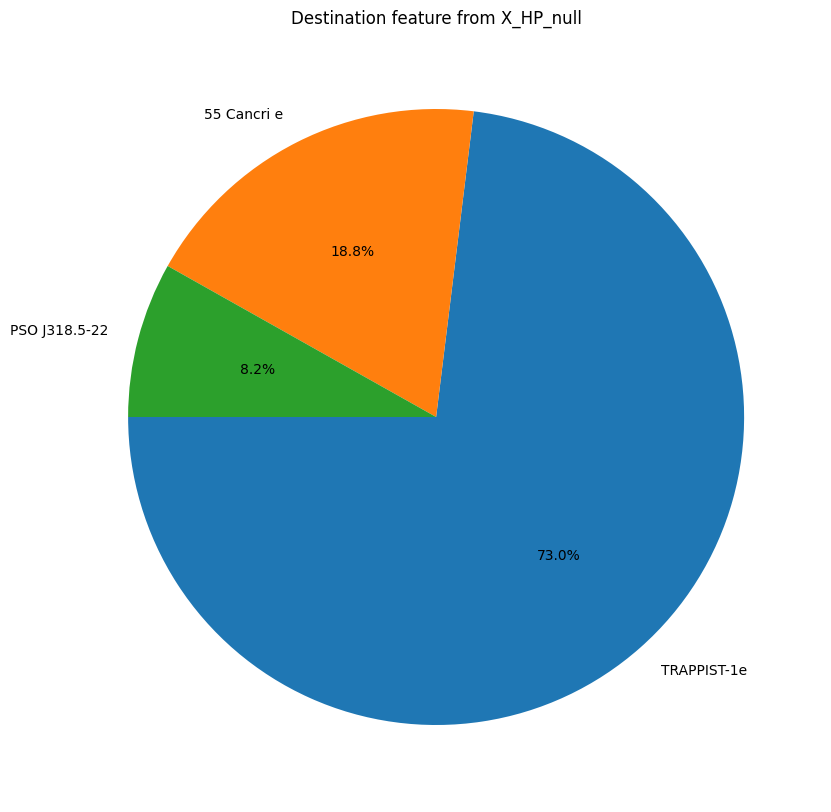

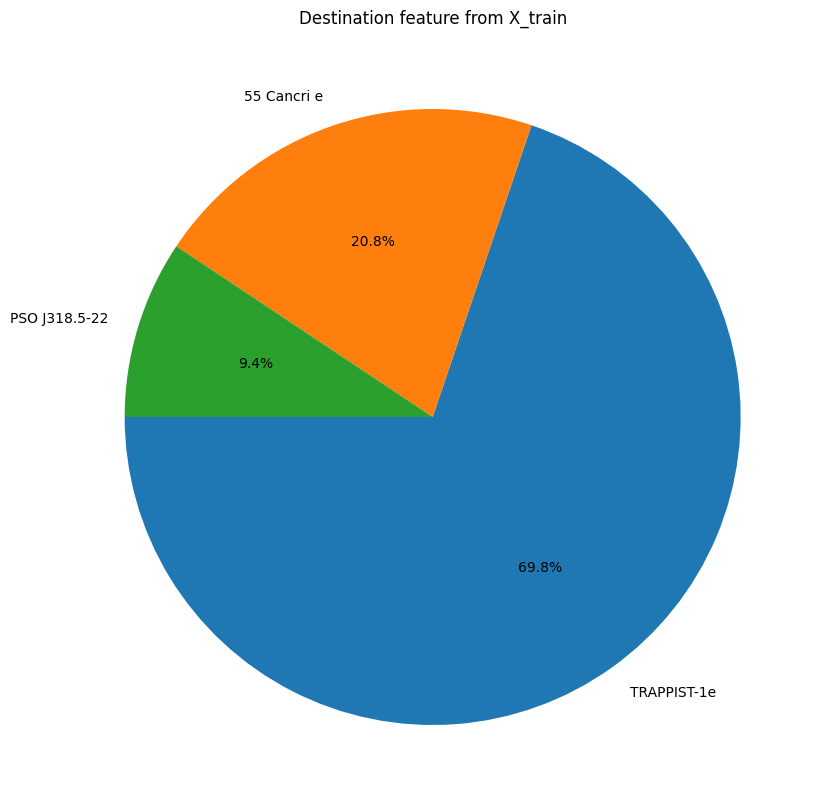

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selection of HomePlanet null values from X_train
X_HP_null = X_train[X_train['HomePlanet'].isnull()]

#Selection oh HomePlanet not null values from X_train
X_HP_notnull = X_train[X_train['HomePlanet'].notnull()]

# Pie chart of Destination feature from X_HP_null
plt.figure(figsize=(10,10))
plt.pie(X_HP_null['Destination'].value_counts(), labels=X_HP_null['Destination'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title('Destination feature from X_HP_null')
plt.show()

# Pie chart of Destination feature from X_train
plt.figure(figsize=(10,10))
plt.pie(X_HP_notnull['Destination'].value_counts(), labels=X_HP_notnull['Destination'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title('Destination feature from X_train')
plt.show()



In [65]:
# Select observations where Destination is 'TRAPPIST-1E' from X_HP_notnull
X_HP_notnull[X_HP_notnull['Destination']=='TRAPPIST-1E']
columns = ['HomePlanet', 'Surname', 'Age', 'HomePlanet', 'Destination']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
X_null = X_train[X_train.isnull().any(axis=1)] # Selection of rows with null values
X_null.head() # Print first 5 rows of X_null

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False


In [8]:

from sklearn.impute import SimpleImputer
MostFrequentImputer = SimpleImputer(strategy = 'most_frequent') # Create an instance of the imputer selecting the most frequent as strategy
MeanImputer = SimpleImputer(strategy = 'mean') # Create an instance of the imputer selecting the mean as strategy


X_train[['HomePlanet']]=MostFrequentImputer.fit_transform(X_train[['HomePlanet']])
X_train[['Destination']]=MostFrequentImputer.fit_transform(X_train[['Destination']])
X_train[['VIP']]=MostFrequentImputer.fit_transform(X_train[['VIP']])
       
X_train[['Age']]=MeanImputer.fit_transform(X_train[['Age']])
X_train[['VRDeck']]=MeanImputer.fit_transform(X_train[['VRDeck']])
X_train[['RoomService']]=MeanImputer.fit_transform(X_train[['RoomService']])
X_train[['FoodCourt']]=MeanImputer.fit_transform(X_train[['FoodCourt']])
X_train[['ShoppingMall']]=MeanImputer.fit_transform(X_train[['ShoppingMall']])
X_train[['Spa']]=MeanImputer.fit_transform(X_train[['Spa']])

X_train['Name']=X_train['Name'].fillna(0)

X_train.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported     4277
dtype: int64

Splitting Cabin feature

In [9]:
new = X_train["PassengerId"].str.split("_", n = 1, expand = True) # PassengerId columns is split in two columns with the "_" as separator 
X_train["PassengerIdA"]= new[0] # New column with the first part of the split
X_train["PassengerIdB"]= new[1] # New column with the second part of the split

# Dropping Cabin columns splited before
X_train.drop(columns =["PassengerId"], inplace = True) 

# df display
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIdA,PassengerIdB
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [10]:
X_train[['Cabin1P', 'Cabin2P', 'Cabin3P']] = X_train['Cabin'].str.split('/', expand=True) # Cabin columns is split in three columns with the "/" as separator

X_train['Cabin1P']= X_train['Cabin1P'].fillna(0) # Null values are replaced with 0 in Cabin1P column
X_train['Cabin2P']= X_train['Cabin2P'].fillna(0) # Null values are replaced with 0 in Cabin2P column  
X_train['Cabin3P']= X_train['Cabin3P'].fillna(0) # Null values are replaced with 0 in Cabin3P column

# Dropping old Name columns
X_train.drop(columns =["Cabin"], inplace = True) # Cabin column is dropped


# df display
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Cabin3P
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


## 2.1 - True/False features

In [11]:
X_train['VIP'] = X_train['VIP'].astype(bool).astype(int) # VIP column is converted to boolean and then to integer
X_train['Transported'] = X_train['Transported'].astype(bool).astype(int) # Transported column is converted to boolean and then to integer
X_train.head()  # Print first 5 rows of X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Cabin3P
0,Europa,False,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,01,F,1,S


In [12]:
print(X_train['HomePlanet'].unique()) # Print unique values of HomePlanet column
print(X_train['Destination'].unique()) # Print unique values of Destination column

['Europa' 'Earth' 'Mars']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


## 2.2 - OrdinalEncoding for 'Destination'
We assume an order with earth as reference.

In [13]:
#Make OHE for Destination column in a new dataframe
X_train_ohe = pd.get_dummies(X_train['Destination'], prefix='Destination').astype(bool).astype(int) 
X_train.drop(columns =["Destination"], inplace = True)

#Concatenate X_train and X_train_ohe
X_train = pd.concat([X_train, X_train_ohe], axis=1)

X_train.head(10)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Cabin3P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,Europa,False,39.0,0,0.0,0.0,0.0,0.0,0.000000,Maham Ofracculy,0,0001,01,B,0,P,0,0,1
1,Earth,False,24.0,0,109.0,9.0,25.0,549.0,44.000000,Juanna Vines,1,0002,01,F,0,S,0,0,1
2,Europa,False,58.0,1,43.0,3576.0,0.0,6715.0,49.000000,Altark Susent,0,0003,01,A,0,S,0,0,1
3,Europa,False,33.0,0,0.0,1283.0,371.0,3329.0,193.000000,Solam Susent,0,0003,02,A,0,S,0,0,1
4,Earth,False,16.0,0,303.0,70.0,151.0,565.0,2.000000,Willy Santantines,1,0004,01,F,1,S,0,0,1
5,Earth,False,44.0,0,0.0,483.0,0.0,291.0,0.000000,Sandie Hinetthews,1,0005,01,F,0,P,0,1,0
6,Earth,False,26.0,0,42.0,1539.0,3.0,0.0,0.000000,Billex Jacostaffey,1,0006,01,F,2,S,0,0,1
7,Earth,True,28.0,0,0.0,0.0,0.0,0.0,306.789482,Candra Jacostaffey,1,0006,02,G,0,S,0,0,1
8,Earth,False,35.0,0,0.0,785.0,17.0,216.0,0.000000,Andona Beston,1,0007,01,F,3,S,0,0,1
9,Europa,True,14.0,0,0.0,0.0,0.0,0.0,0.000000,Erraiam Flatic,1,0008,01,B,1,P,1,0,0


## 2.3 - OHE for 'Cabin1P'


In [14]:
X_train['Cabin1P'].unique()

array(['B', 'F', 'A', 'G', 0, 'E', 'D', 'C', 'T'], dtype=object)

In [15]:
X_train = X_train.replace({'Cabin1P': r'A\w*'}, {'Cabin1P': '1'}, regex=True)
X_train = X_train.replace({'Cabin1P': r'B\w*'}, {'Cabin1P': '2'}, regex=True)
X_train = X_train.replace({'Cabin1P': r'C\w*'}, {'Cabin1P': '3'}, regex=True)
X_train = X_train.replace({'Cabin1P': r'D\w*'}, {'Cabin1P': '4'}, regex=True)
X_train = X_train.replace({'Cabin1P': r'E\w*'}, {'Cabin1P': '5'}, regex=True)
X_train = X_train.replace({'Cabin1P': r'F\w*'}, {'Cabin1P': '6'}, regex=True)
X_train = X_train.replace({'Cabin1P': r'G\w*'}, {'Cabin1P': '7'}, regex=True)
X_train = X_train.replace({'Cabin1P': r'T\w*'}, {'Cabin1P': '8'}, regex=True)
X_train.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Cabin3P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,Europa,False,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,01,2,0,P,0,0,1
1,Earth,False,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,01,6,0,S,0,0,1
2,Europa,False,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,01,1,0,S,0,0,1
3,Europa,False,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,02,1,0,S,0,0,1
4,Earth,False,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,01,6,1,S,0,0,1


## 2.3 - OHE for 'HomePlanet'

In [16]:
ohe_HomePlanet = pd.get_dummies(X_train['HomePlanet'], prefix='ohe_HomePlanet').astype(bool).astype(int) 
X_train.drop('HomePlanet', axis=1, inplace=True)

## 2.4 - OHE for 'Cabin3P'

In [17]:
ohe_Cabin3P = pd.get_dummies(X_train['Cabin3P'], prefix='ohe_Cabin3P').astype(bool).astype(int) 
X_train.drop('Cabin3P', axis=1, inplace=True)

X_train = pd.concat([X_train, ohe_HomePlanet, ohe_Cabin3P], axis=1)
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,ohe_HomePlanet_Earth,ohe_HomePlanet_Europa,ohe_HomePlanet_Mars,ohe_Cabin3P_0,ohe_Cabin3P_P,ohe_Cabin3P_S
0,False,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,01,2,0,0,0,1,0,1,0,0,1,0
1,False,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,01,6,0,0,0,1,1,0,0,0,0,1
2,False,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,01,1,0,0,0,1,0,1,0,0,0,1
3,False,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,02,1,0,0,0,1,0,1,0,0,0,1
4,False,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,01,6,1,0,0,1,1,0,0,0,0,1


In [18]:
X_train.dtypes

CryoSleep                     object
Age                          float64
VIP                            int32
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Name                          object
Transported                    int32
PassengerIdA                  object
PassengerIdB                  object
Cabin1P                       object
Cabin2P                       object
Destination_55 Cancri e        int32
Destination_PSO J318.5-22      int32
Destination_TRAPPIST-1e        int32
ohe_HomePlanet_Earth           int32
ohe_HomePlanet_Europa          int32
ohe_HomePlanet_Mars            int32
ohe_Cabin3P_0                  int32
ohe_Cabin3P_P                  int32
ohe_Cabin3P_S                  int32
dtype: object

In [19]:
#Transform Cabin1P,Cabin2P, PassengerIdA,PassengerIdB, Age to int32
X_train['Cabin1P'] = X_train['Cabin1P'].astype('int32')
X_train['Cabin2P'] = X_train['Cabin2P'].astype('int32')
X_train['PassengerIdA'] = X_train['PassengerIdA'].astype('int32')
X_train['PassengerIdB'] = X_train['PassengerIdB'].astype('int32')
X_train['Age'] = X_train['Age'].astype('int32')

#transform CryoSleep to boolean int
X_train['CryoSleep'] = X_train['CryoSleep'].astype(bool).astype(int)

X_train.dtypes
X_train.head(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,ohe_HomePlanet_Earth,ohe_HomePlanet_Europa,ohe_HomePlanet_Mars,ohe_Cabin3P_0,ohe_Cabin3P_P,ohe_Cabin3P_S
0,0,39,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,2,0,0,0,1,0,1,0,0,1,0
1,0,24,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,6,0,0,0,1,1,0,0,0,0,1
2,0,58,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,1,0,0,0,1,0,1,0,0,0,1
3,0,33,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,1,0,0,0,1,0,1,0,0,0,1
4,0,16,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,6,1,0,0,1,1,0,0,0,0,1


## 2.5 - Name feature onto Name and surname for future processing

In [20]:

# new data frame with split value columns
new = X_train["Name"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
X_train["First Name"]= new[0]
 
# making separate last name column from new data frame
X_train["Last Name"]= new[1]
 
# Dropping old Name columns
X_train.drop(columns =["Name"], inplace = True)
 
# df display
X_train.head(20)

#Transform RoomService, FoodCourt, ShoppingMall, Spa and VRDeck to float16
X_train['RoomService'] = X_train['RoomService'].astype('float16')
X_train['FoodCourt'] = X_train['FoodCourt'].astype('float16')
X_train['ShoppingMall'] = X_train['ShoppingMall'].astype('float16')
X_train['Spa'] = X_train['Spa'].astype('float16')
X_train['VRDeck'] = X_train['VRDeck'].astype('float16')


In [21]:
X_train.dtypes

CryoSleep                      int32
Age                            int32
VIP                            int32
RoomService                  float16
FoodCourt                    float16
ShoppingMall                 float16
Spa                          float16
VRDeck                       float16
Transported                    int32
PassengerIdA                   int32
PassengerIdB                   int32
Cabin1P                        int32
Cabin2P                        int32
Destination_55 Cancri e        int32
Destination_PSO J318.5-22      int32
Destination_TRAPPIST-1e        int32
ohe_HomePlanet_Earth           int32
ohe_HomePlanet_Europa          int32
ohe_HomePlanet_Mars            int32
ohe_Cabin3P_0                  int32
ohe_Cabin3P_P                  int32
ohe_Cabin3P_S                  int32
First Name                    object
Last Name                     object
dtype: object

## 2.5 - Feature engineering

### 2.5.1 - New feature to map if there was some expense or not

In [22]:
X_train['TotalWasted']= X_train['RoomService']+X_train['FoodCourt']+X_train['ShoppingMall']+X_train['Spa']+X_train['VRDeck']
X_train['Wasted']=X_train['TotalWasted'].map(lambda x: 1 if x>0 else 0)
#X_train = X_train.drop(['TotalWasted'], axis=1)
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,ohe_HomePlanet_Earth,ohe_HomePlanet_Europa,ohe_HomePlanet_Mars,ohe_Cabin3P_0,ohe_Cabin3P_P,ohe_Cabin3P_S,First Name,Last Name,TotalWasted,Wasted
0,0,39,0,0.0,0.0,0.0,0.0,0.0,0,1,1,2,0,0,0,1,0,1,0,0,1,0,Maham,Ofracculy,0.0,0
1,0,24,0,109.0,9.0,25.0,549.0,44.0,1,2,1,6,0,0,0,1,1,0,0,0,0,1,Juanna,Vines,736.0,1
2,0,58,1,43.0,3576.0,0.0,6716.0,49.0,0,3,1,1,0,0,0,1,0,1,0,0,0,1,Altark,Susent,10384.0,1
3,0,33,0,0.0,1283.0,371.0,3328.0,193.0,0,3,2,1,0,0,0,1,0,1,0,0,0,1,Solam,Susent,5176.0,1
4,0,16,0,303.0,70.0,151.0,565.0,2.0,1,4,1,6,1,0,0,1,1,0,0,0,0,1,Willy,Santantines,1091.0,1


### 2.5.2 - New features as intervals of age

In [23]:
def func(x):
    if x < 14:
        return 1
    elif (x>14) & (x<=24):
        return 2
    elif (x>24) & (x<=64):
        return 3
    else:
        return 4

    
X_train['AgeGroup']=X_train['Age'].apply(func)


In [24]:
"""X_nullF = X_train[X_train['PassengerId'].isin(X_null['PassengerId'])]
#X_nullF.shape
X_nullF.corr()"""

"X_nullF = X_train[X_train['PassengerId'].isin(X_null['PassengerId'])]\n#X_nullF.shape\nX_nullF.corr()"

In [25]:
X_trainCRyoSleep = X_train[X_train['CryoSleep'] == 1]
X_trainCRyoSleep[['CryoSleep', 'TotalWasted']].head(25)
X_trainCRyoSleep['TotalWasted'].describe()

count     4891.0
mean         inf
std          inf
min          0.0
25%          0.0
50%          0.0
75%          0.0
max      20480.0
Name: TotalWasted, dtype: float64

In [26]:
X_train.isnull().sum()

CryoSleep                      0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Transported                    0
PassengerIdA                   0
PassengerIdB                   0
Cabin1P                        0
Cabin2P                        0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
ohe_HomePlanet_Earth           0
ohe_HomePlanet_Europa          0
ohe_HomePlanet_Mars            0
ohe_Cabin3P_0                  0
ohe_Cabin3P_P                  0
ohe_Cabin3P_S                  0
First Name                   294
Last Name                    294
TotalWasted                    0
Wasted                         0
AgeGroup                       0
dtype: int64

In [27]:
X_trainCRyoSleep[['CryoSleep', 'TotalWasted']].head(25)


,CryoSleep,TotalWasted
7,1,306.750
9,1,0.000
10,1,174.875
18,1,0.000
21,1,0.000
22,1,0.000
23,1,174.875
25,1,222.875
28,1,174.875
36,1,0.000


In [28]:
X_train.head(25)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,ohe_HomePlanet_Earth,ohe_HomePlanet_Europa,ohe_HomePlanet_Mars,ohe_Cabin3P_0,ohe_Cabin3P_P,ohe_Cabin3P_S,First Name,Last Name,TotalWasted,Wasted,AgeGroup
0,0,39,0,0.0,0.0,0.000,0.0,0.00,0,1,1,2,0,0,0,1,0,1,0,0,1,0,Maham,Ofracculy,0.000,0,3
1,0,24,0,109.0,9.0,25.000,549.0,44.00,1,2,1,6,0,0,0,1,1,0,0,0,0,1,Juanna,Vines,736.000,1,2
2,0,58,1,43.0,3576.0,0.000,6716.0,49.00,0,3,1,1,0,0,0,1,0,1,0,0,0,1,Altark,Susent,10384.000,1,3
3,0,33,0,0.0,1283.0,371.000,3328.0,193.00,0,3,2,1,0,0,0,1,0,1,0,0,0,1,Solam,Susent,5176.000,1,3
4,0,16,0,303.0,70.0,151.000,565.0,2.00,1,4,1,6,1,0,0,1,1,0,0,0,0,1,Willy,Santantines,1091.000,1,2
5,0,44,0,0.0,483.0,0.000,291.0,0.00,1,5,1,6,0,0,1,0,1,0,0,0,1,0,Sandie,Hinetthews,774.000,1,3
6,0,26,0,42.0,1539.0,3.000,0.0,0.00,1,6,1,6,2,0,0,1,1,0,0,0,0,1,Billex,Jacostaffey,1584.000,1,3
7,1,28,0,0.0,0.0,0.000,0.0,306.75,1,6,2,7,0,0,0,1,1,0,0,0,0,1,Candra,Jacostaffey,306.750,1,3
8,0,35,0,0.0,785.0,17.000,216.0,0.00,1,7,1,6,3,0,0,1,1,0,0,0,0,1,Andona,Beston,1018.000,1,3
9,1,14,0,0.0,0.0,0.000,0.0,0.00,1,8,1,2,1,1,0,0,0,1,0,0,1,0,Erraiam,Flatic,0.000,0,4


In [29]:
X_train['CryoSleep']=X_train['CryoSleep'].fillna(X_train['Wasted'].map(lambda x: True if x<1 else False))
X_train['CryoSleep'] = X_train['CryoSleep'].astype(bool).astype(int)
X_train.head(25)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,ohe_HomePlanet_Earth,ohe_HomePlanet_Europa,ohe_HomePlanet_Mars,ohe_Cabin3P_0,ohe_Cabin3P_P,ohe_Cabin3P_S,First Name,Last Name,TotalWasted,Wasted,AgeGroup
0,0,39,0,0.0,0.0,0.000,0.0,0.00,0,1,1,2,0,0,0,1,0,1,0,0,1,0,Maham,Ofracculy,0.000,0,3
1,0,24,0,109.0,9.0,25.000,549.0,44.00,1,2,1,6,0,0,0,1,1,0,0,0,0,1,Juanna,Vines,736.000,1,2
2,0,58,1,43.0,3576.0,0.000,6716.0,49.00,0,3,1,1,0,0,0,1,0,1,0,0,0,1,Altark,Susent,10384.000,1,3
3,0,33,0,0.0,1283.0,371.000,3328.0,193.00,0,3,2,1,0,0,0,1,0,1,0,0,0,1,Solam,Susent,5176.000,1,3
4,0,16,0,303.0,70.0,151.000,565.0,2.00,1,4,1,6,1,0,0,1,1,0,0,0,0,1,Willy,Santantines,1091.000,1,2
5,0,44,0,0.0,483.0,0.000,291.0,0.00,1,5,1,6,0,0,1,0,1,0,0,0,1,0,Sandie,Hinetthews,774.000,1,3
6,0,26,0,42.0,1539.0,3.000,0.0,0.00,1,6,1,6,2,0,0,1,1,0,0,0,0,1,Billex,Jacostaffey,1584.000,1,3
7,1,28,0,0.0,0.0,0.000,0.0,306.75,1,6,2,7,0,0,0,1,1,0,0,0,0,1,Candra,Jacostaffey,306.750,1,3
8,0,35,0,0.0,785.0,17.000,216.0,0.00,1,7,1,6,3,0,0,1,1,0,0,0,0,1,Andona,Beston,1018.000,1,3
9,1,14,0,0.0,0.0,0.000,0.0,0.00,1,8,1,2,1,1,0,0,0,1,0,0,1,0,Erraiam,Flatic,0.000,0,4


## 2.6 - Preprocessing data prior to modeling

In [30]:
X_train = X_train.drop(['First Name', 'Last Name'], axis=1)

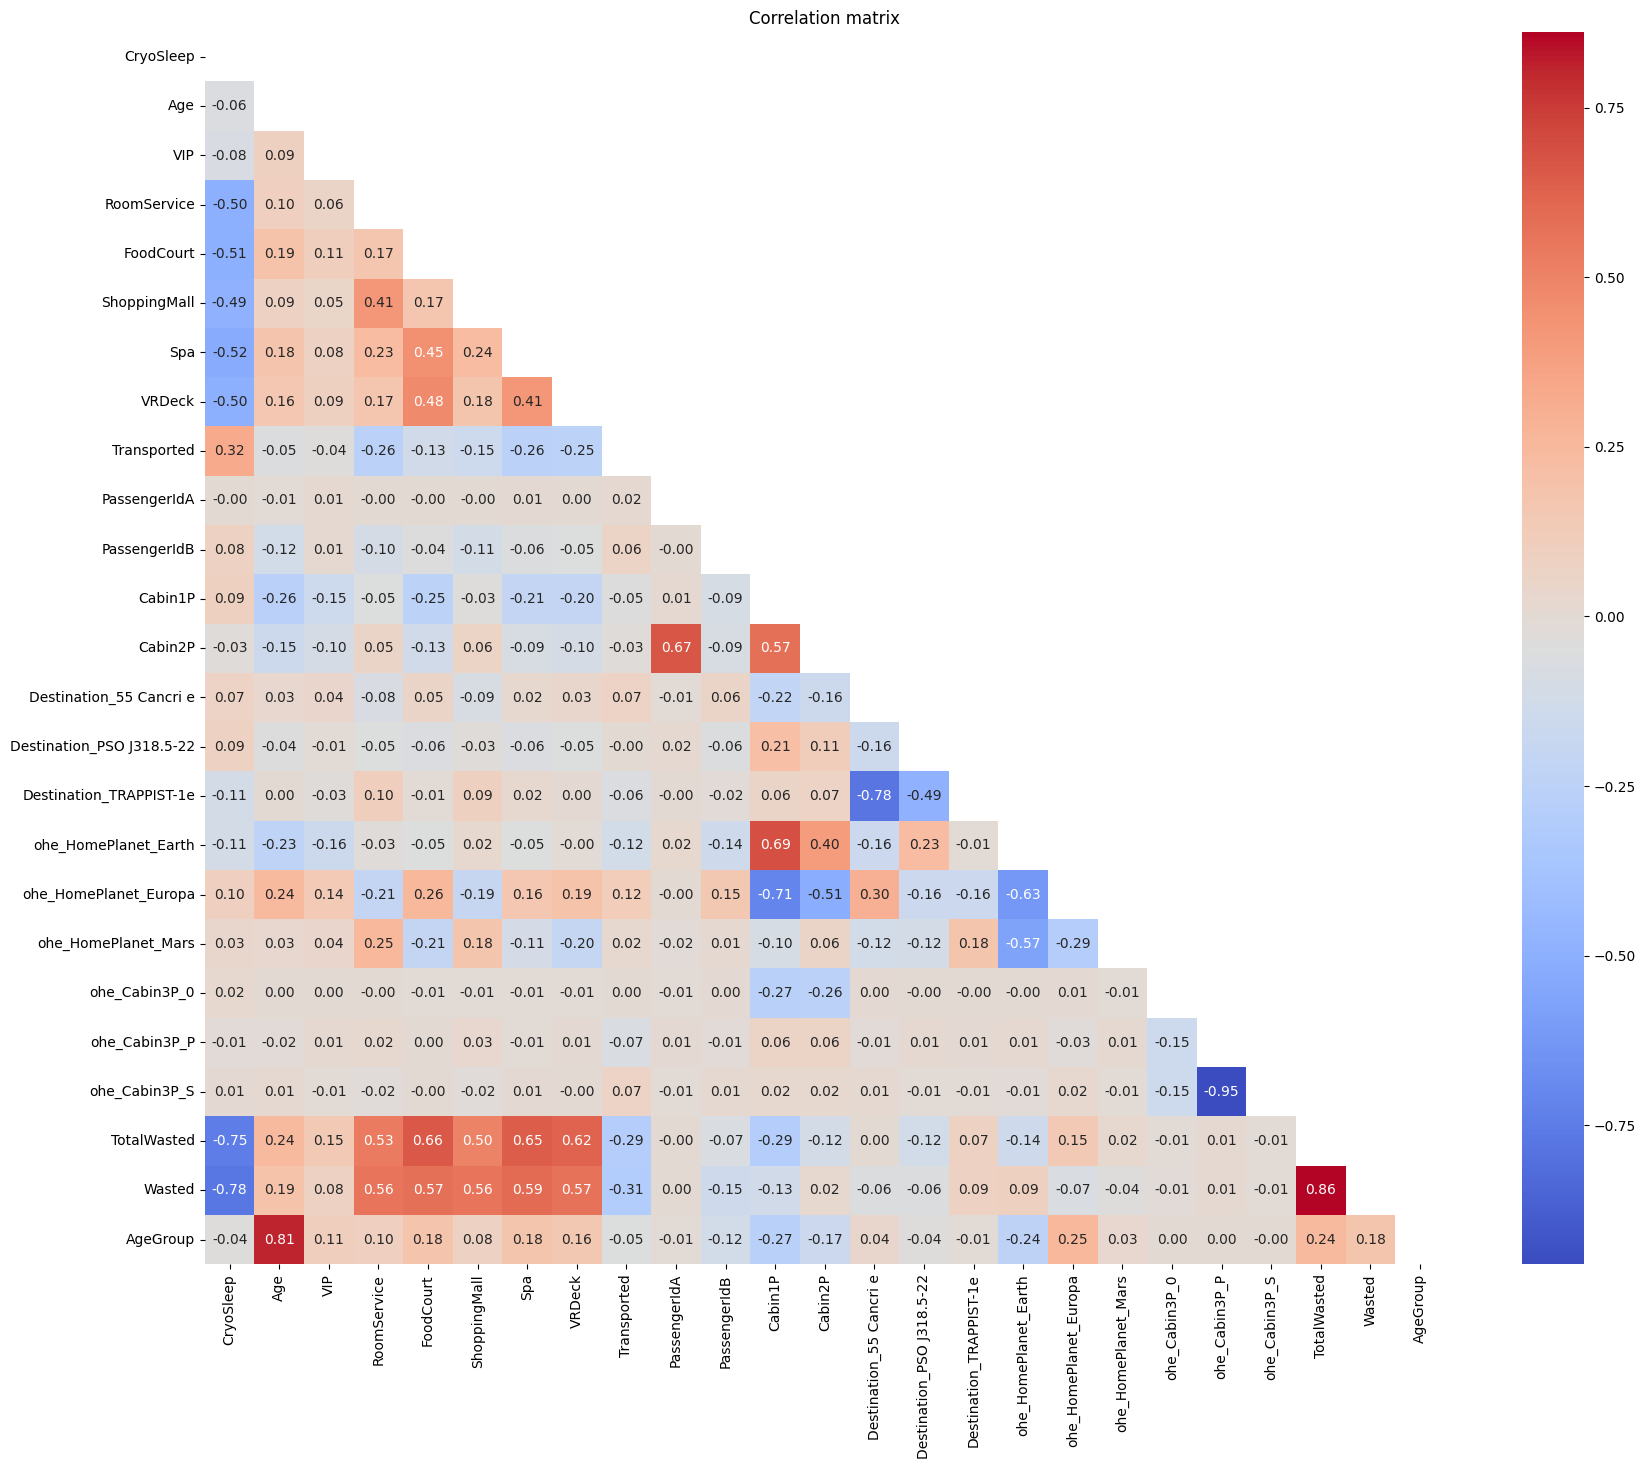

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Spearman correlation 
corr_matrix = X_train.corr(method='spearman')

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(20, 16))

# Dibujar el heatmap con la máscara
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation matrix")
plt.show()


In [ ]:
#X_train = X_train.drop(['First Name', 'Last Name', 'TotalWasted'], axis=1)
X_train = X_train.drop(['First Name', 'Last Name', 'TotalWasted'], axis=1)


X_trainPrev = X_train
X_train = X_trainPrev[X_trainPrev['PassengerId'].isin(dataTrain['PassengerId'])]
y_train = X_train['Transported']
X_test = X_trainPrev[X_trainPrev['PassengerId'].isin(dataTest['PassengerId'])]

X_train = X_train.drop(['PassengerId','Transported'], axis=1)
X_test = X_test.drop(['PassengerId','Transported'], axis=1)

X_trainF = X_train
y_trainF = y_train

In [ ]:
X_trainF.shape

(8693, 21)

import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from hyperopt import hp, tpe, fmin


X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF , random_state=123, train_size=0.8)

space={'max_depth':hp.quniform('max_depth', 3, 4, 1),
       'eta':hp.uniform ('eta', 0.1, 0.2),
       'n_estimators':hp.quniform('n_estimators', 50, 1000, 5),
       'gamma': hp.uniform ('gamma', 2,2.2)

          }


def objective(params):

    params={'max_depth':int(params['max_depth']),
        'eta':params['eta'],
        'n_estimators':int(params['n_estimators']),
           'gamma':params['gamma']
}
        
    model = xgb.XGBClassifier(objective='reg:logistic',early_stopping_rounds = 50, eval_metric = 'error',
                              **params)

    evaluation = [(X_train, y_train), (X_val, y_val)]

    model.fit(X_train, y_train,
              eval_set = evaluation,verbose = False)

    pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, pred>0.6)

    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    return (1-accuracy)

best = fmin(fn=objective, space=space, max_evals=50, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 80],
    'max_features': [4],
    'min_samples_leaf': [4],
    'min_samples_split': [20, 40],
    'n_estimators': [300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_val, y_val)
grid_accuracy = evaluate(best_grid, X_val, y_val)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


grid_search.best_params_


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, 
                             random_state=0,
                             bootstrap = True,
                             max_depth = 60,
                             max_features = 4,
                             min_samples_leaf = 4,
                             min_samples_split = 20)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_val)



# Check accuracy score 

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_pred)))

In [ ]:
try:
  import optuna
except ModuleNotFoundError:
  !pip install optuna 

import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
# sklearn tools and models
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, cross_validate

# XGBoost
import xgboost as xgb

# LGBM
import lightgbm as lgbm



def objective_lgbm(trial, X_train=X_trainF, y=y_trainF):

  param_grid_lgbm = {
      'objective': trial.suggest_categorical('objective', ['binary']),
      'boosting_type': trial.suggest_categorical('boosting_type', ['dart']),
      'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15, step=0.005),
      'num_leaves': trial.suggest_int('num_leaves', 7, 15, step=1),
      'max_depth': trial.suggest_int('max_depth', 5, 15, step=1),
      'n_estimators': trial.suggest_int('n_estimators', 475, 525, step=5),
      'reg_alpha': trial.suggest_float('reg_alpha', 0.15, 0.4, step=0.01), 
      'reg_lambda': trial.suggest_float('reg_lambda', 0.85, 1, step=0.01),
      'min_child_samples': trial.suggest_int('min_child_samples', 5, 15, step=1)
      }

  lgbm_classifier = lgbm.LGBMClassifier(**param_grid_lgbm)

  score = cross_val_score(lgbm_classifier, X_train, y, n_jobs=-1, cv=5)
  return score.mean()

study_lgbm = optuna.create_study(direction='maximize')


study_lgbm.optimize(objective_lgbm, n_trials=25)


round(study_lgbm.best_value, 5)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF , random_state=123, train_size=0.8)

lgbm_model = lgbm.LGBMClassifier(objective = 'binary',
 boosting_type = 'dart',
 learning_rate = 0.09,
 num_leaves = 9,
 max_depth = 10,
 n_estimators = 515,
 reg_alpha = 0.37,
 reg_lambda = 0.96,
 min_child_samples= 11)

lgbm_model.fit(X_train, y_train)

pred = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 82.06%


import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from hyperopt import hp, tpe, fmin

X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF , random_state=123, train_size=0.85, shuffle=True)

evaluation = [(X_train, y_train), (X_val, y_val)]



model = xgb.XGBClassifier(objective='reg:logistic', eval_metric = ["auc", "logloss"], gamma= 2.1170141188195593, eta= 0.1456836305234355, max_depth = 4, n_estimators= 1000, 
                          early_stopping_rounds =25)
model.fit(X_train, y_train, eval_set = evaluation, verbose=False)

pred = model.predict(X_val)
accuracy = 1-accuracy_score(y_val, pred>0.5)
#print(accuracy)   
    
accuracy = accuracy_score(y_val, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = model.evals_result()
epochs = len(results["validation_0"]["auc"])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["logloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["logloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("XGBoost Log Loss")
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["auc"], label="Train")
ax.plot(x_axis, results["validation_1"]["auc"], label="Test")
ax.legend()
pyplot.ylabel("Classification Error")
pyplot.title("XGBoost Classification Error")
pyplot.show()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import xgboost as xgb




pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('reducer', PCA(n_components=18)),
                ('clasifier',xgb.XGBClassifier(objective='reg:logistic', eta= 0.15, max_depth = 4, n_estimators= 115))
    
])

pipe.fit(X_train, y_train)

accuracy = pipe.score(X_val, y_val)

print(f'{accuracy:.1%} test set accuracy')

In [ ]:
X_test.shape

(4277, 21)

In [ ]:
X_train.shape

(6954, 21)

In [ ]:
X_test.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerIdA,PassengerIdB,Cabin1P,Cabin2P,ohe_HomePlanet_Earth,ohe_HomePlanet_Europa,ohe_HomePlanet_Mars,ohe_Cabin3P_0,ohe_Cabin3P_P,ohe_Cabin3P_S,Wasted,AgeGroup
0,1,1,27.0,0,0.0,0.0,0.0,0.0,0.0,13,1,7,3,1,0,0,0,0,1,0,3
1,0,1,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,1,6,4,1,0,0,0,0,1,1,2
2,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,19,1,3,0,0,1,0,0,0,1,0,3
3,0,1,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,1,3,1,0,1,0,0,0,1,1,3
4,0,1,20.0,0,10.0,0.0,635.0,0.0,0.0,23,1,6,5,1,0,0,0,0,1,1,2


In [ ]:
y_pred = lgbm_model.predict(X_test)

In [ ]:
y_pred = y_pred.astype(bool)

In [ ]:
output = pd.DataFrame({'PassengerID': dataTest['PassengerId'],
                       'Transported': y_pred})
output.to_csv('submission.csv', index=False) 